
# Project: Investigate a Dataset - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  

> Welcome to this movies data analysis. we'll be investigating a movie dataset from kaggle. our aim is to uncover as many insight we can get from the data. The data initially contains 21 fields and 10866 records. 

### Question(s) for Analysis
> We'll be picking specific fields in the data set and running our analysis. 
> Fields like the companies that produced the movies,directors runtime and a calculated field.
> **Questions*
> 1. Which Companies had the highest profit?
> 2. Which Company made the most movies?
> 3. Which director made the highest profit from movies.
> 4. Is there any trend in the number of movies released each year?
> 5. Is there a relationship between the number of movies directed and the profit?

<a id='wrangling'></a>
## Data Wrangling

> In this section
> 1. Load the data and import the libraries we might need.
> 2. Inspect it to familiarize myself with the variables
> 3. Check for inconsistencies in the data
> 4. Cleaning the data 
> 5. Give reasons for the decisions taken.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# what is the shape of our data?
df.shape


(10866, 21)

Our data consist of 10866 rows and 21 columns

In [4]:
# investigate the datatypes present and the missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From what we can see above, some columns have missing values. we might decide to fill the missing values by a metric for the numeric columns. also looking at the info, i see some columns that will not be necessary for our analysis. These should be dropped.

   The values in each field is in its right type.There's so much work to be done here.hence no need for typecasting. 
   I will shrink the number of fields from 21 to 14 based on the ones i think will be relevant for the analysis.
   it is also important to note that we have some missing values in the production_companies field. 

In [5]:
for col in df.columns:
    print(col)

id
imdb_id
popularity
budget
revenue
original_title
cast
homepage
director
tagline
keywords
overview
runtime
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj
revenue_adj


In [6]:
# get a view of a random sample of the data
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7301,35280,tt0069050,0.095011,0,0,The Other,Uta Hagen|Diana Muldaur|Chris Udvarnoky|Martin...,NaN,Robert Mulligan,Niles and Holland are as close as twin brother...,...,"Chilling and eerie, this supernatural tale of ...",108,Drama|Horror|Mystery,Twentieth Century Fox Film Corporation|Benchma...,5/23/72,10,5.3,1972,0.000000e+00,0.000000e+00
9474,11966,tt0096101,0.689972,0,21630088,Short Circuit 2,Fisher Stevens|Michael McKean|Cynthia Gibb|Jac...,NaN,Kenneth Johnson,The adventures of America's most electric lead...,...,Robot Johnny Five comes to the city and gets m...,110,Comedy|Family|Science Fiction|Drama,David Foster Productions|TriStar Pictures,7/6/88,86,5.4,1988,0.000000e+00,3.988353e+07
1165,288445,tt3593120,0.163690,0,0,The Device,Angela DiMarco|David S. Hogan|Kate Alden|Gabri...,http://www.theoctoberpeople.net,Jeremy Berg,NaN,...,Abby and Rebecca Powell haven't seen each othe...,90,Thriller|Horror|Science Fiction,Ruthless Pictures|The October People,12/16/14,16,3.3,2014,0.000000e+00,0.000000e+00
4105,9260,tt0271259,0.249411,1200000,0,Welcome to Collinwood,William H. Macy|Isaiah Washington|Sam Rockwell...,NaN,Anthony Russo|Joe Russo,Five guys. One safe. No brains.,...,Five hapless inner-city low-lifes unsuccessful...,86,Comedy|Crime,Gaylord Films,5/24/02,22,6.2,2002,1.454714e+06,0.000000e+00
5840,192136,tt2304771,0.229656,35000000,27330000,Mandela: Long Walk to Freedom,Idris Elba|Naomie Harris|Tony Kgoroge|Riaad Mo...,NaN,Justin Chadwick,It is an ideal for which I am prepared to die.,...,A chronicle of Nelson Mandela's life journey f...,141,Drama|History,Distant Horizons|Film Afrika Worldwide|Videovi...,12/6/13,165,6.5,2013,3.276117e+07,2.558179e+07


In [7]:
# run a frequency check on the budget field.  
df['budget'].value_counts().head()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
Name: budget, dtype: int64

The output shows that we have a lot of zeros in the field above. recall we said that this also means that those records should be treated as nulls. this is perculiar to this dataset. having so much nulls, we have to do something about this field.

In [8]:
# check the amount of zero records in the budget column.
df['revenue'].value_counts().head()

0           6016
12000000      10
10000000       8
11000000       7
6000000        6
Name: revenue, dtype: int64

From the output of the code above, it shows that we have more values that are missing in budget and revenue fields in thousands. This missing values are actually showing as zeros in the records. It could be very misleading to use them like that in our analysis as it would give us false results at the end.

In [9]:
#investigate the homepage field
df['homepage'].isnull().sum()

7930

this shows that we have so many missing values in this field too.


### Data Cleaning
> Here our main focus is to clean the data and put it in the right state before we begin our analysis. 

> Here we will do the following:
> 1. Drop Fields that will not be necessary for the Analysis
> 2. Deal with the missing values in the Fields.
> 3. Create a new calculated Field that will be useful for our analysis.
 

In this stage, i will be cleaning the data. 
I will drop some columns that are not relevant to the research question i have and also others that contain a lot of missing values. 
Columns to be dropped are:
1. budget
2. revenue
3. homepage
4. id
5. tagline
6. overview
7. imdb_id
8. release_date
> I had two columns for revenues and budget. i have to drop one of them for each.
Then i will create a new field called profit that will be used for Analysis.


In [10]:
df.drop(['budget','revenue','homepage','id','tagline','overview','imdb_id','release_date'], axis=1, inplace=True)
df.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df.tail()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,11,7.4,1966,0.000000,0.0
10862,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000,0.0
10863,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.000000,0.0
10864,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000,0.0
10865,0.035919,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,74,Horror,Norm-Iris,15,1.5,1966,127642.279154,0.0


Inspecting the table, i see zeros in the budget_adj and revenue_adj fields. this will be treated as nulls for the same reasons mentioned initially. 

What we have to do is check for the measures of central tendencies and pick one suitable to fill this missing values.

In [12]:
# find the mean of the revenue
df.revenue_adj.mean()

51364363.253250986

In [13]:
# find the mode of the revenue
df.revenue_adj.mode()

0    0.0
dtype: float64

In [14]:
# find the median of the revenue
df.revenue_adj.median()

0.0

In [15]:
# find the mean of the budget
df.budget_adj.mean()

17551039.82288678

In [16]:
# find the mode of the budget
df.budget_adj.mode()

0    0.0
dtype: float64

In [17]:
# find the mode of the budget.
df.budget_adj.median()

0.0

 From the three output above, our median and mode are zero are not sufficient reasons why we should use it. because it is not possible for a movie that was produced not to have a budget and revenue. My best bet is to calculate the mean of the revenues and budget. Use these values to replace the ones with zero and calculate the profit.

In [18]:
def missing_filler(x):
    x.mean()
    x_new = pd.DataFrame(x).replace(0,x.mean()).values
    x = x_new
    return x

here we defined a function that calculates the mean and replace the zeros with the calculated mean.

In [19]:
df['revenue_adj'] = missing_filler(df['revenue_adj'])

here we implement our function we defined earlier to calculate and fill the missing values, in this case the records with zero, with the mean value. 

In [20]:
df['budget_adj'] = missing_filler(df['budget_adj'])

the mean of the budget_adj is calculated and filled by calling the function.

In [21]:
df.tail()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,11,7.4,1966,1.755104e+07,5.136436e+07
10862,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,1.755104e+07,5.136436e+07
10863,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,11,6.5,1966,1.755104e+07,5.136436e+07
10864,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,1.755104e+07,5.136436e+07
10865,0.035919,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,74,Horror,Norm-Iris,15,1.5,1966,1.276423e+05,5.136436e+07


This was ran to inspect the tail of our data. initially, we had most of the zeros highly concerntrated at the bottom


In [22]:
# now create a new column for profit
df['profit'] = df['revenue_adj']-df['budget_adj']
df.head(3)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08


In [23]:
# how many records in the profit are zero.
df.loc[df['profit'] == 0].shape

(4, 14)

In [24]:
# what is the mode of the profit
df.profit.mode()

0    3.381332e+07
dtype: float64

In [25]:
# what is the median of the profit
df.profit.median()

33813323.430364206

In [26]:
# what is the mean profit
mean_profit = df.profit.mean()
mean_profit

53051063.76723101

 having compared all the measures of central tendencies, i can decide to leave it like that or replace it with the mean. alternatively, since the number of zeros are just 4 out of our entire DataFrame, i can decide to drop it. but i would rather leave it there instead. that would mean that the exact same amount spent on budget was realized at the end of the day. 

In [27]:
df.sample(8)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
9816,0.513067,Death Race 2000,David Carradine|Simone Griffeth|Sylvester Stal...,Paul Bartel,dystopia|street race|reality spoof,80,Action|Comedy|Science Fiction,New World Pictures,57,5.9,1975,1.215546e+06,5.136436e+07,5.014882e+07
1517,0.654405,Mary and Max,Toni Collette|Philip Seymour Hoffman|Eric Bana...,Adam Elliot,chocolate|birthmark|only child|approach|australia,92,Animation|Comedy|Drama,icon,359,7.5,2009,8.131203e+06,5.136436e+07,4.323316e+07
5436,3.625529,12 Years a Slave,Chiwetel Ejiofor|Michael Fassbender|Lupita Nyo...,Steve McQueen,whip|slavery|plantation|night shift|kidnapping,134,Drama|History,Plan B Entertainment|Regency Enterprises|River...,2241,7.9,2013,1.872067e+07,1.750382e+08,1.563176e+08
5863,0.215019,The Marine 3: Homefront,Mike Mizanin|Neal McDonough|Michael Eklund|Ash...,Scott Wiper,NaN,86,Action,WWE Studios,16,4.7,2013,1.755104e+07,5.136436e+07,3.381332e+07
9049,0.555990,Twilight,Paul Newman|Susan Sarandon|Gene Hackman|Reese ...,Robert Benton,ex-cop|retired,94,Drama|Crime|Mystery|Thriller,Paramount Pictures|Scott Rudin Productions|Cin...,16,6.6,1998,1.755104e+07,5.136436e+07,3.381332e+07
8605,0.313033,The Mirror Has Two Faces,Barbra Streisand|Jeff Bridges|Lauren Bacall|Ge...,Barbra Streisand,sex|professor|wedding|woman director|columbia ...,126,Comedy|Drama|Romance,TriStar Pictures|Phoenix Pictures,21,6.3,1996,5.838910e+07,5.136436e+07,-7.024740e+06
3840,0.129723,Conan O'Brien Can't Stop,Conan O'Brien|Andy Richter|Jimmy Vivino|Scott ...,Rodman Flender,comedian|humor|behind the scenes|independent f...,89,Comedy|Documentary|Music,NaN,25,5.7,2011,1.755104e+07,2.171054e+05,-1.733393e+07
8325,0.296309,Juice,Omar Epps|Tupac Shakur|Khalil Kain|Jermaine 'H...,Ernest R. Dickerson,street gang|black people|rap|hip-hop|violence,96,Action|Crime|Drama|Thriller,Paramount Pictures,55,7.1,1992,7.770121e+06,3.130874e+07,2.353862e+07


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
profit                  10866 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.2+ MB


In [29]:
# how many null values do we have in the companies field?
df.production_companies.isnull().sum()

1030

In [30]:
# what is the mode of the companies?
mode_companies = df.production_companies.mode()
mode_companies

0    Paramount Pictures
dtype: object

Since i have so 1030 missing values in the production_companies field, i have to deal with it.so i will replace the entries in that field with the mode or drop it. I have decided to drop it instead

In [31]:
# drop missing values in the production_companies field
df.production_companies.dropna(inplace=True)

In [32]:
# check if there's still missing value in this field.
df.production_companies.isnull().value_counts()

False    9836
Name: production_companies, dtype: int64

In [33]:
df.production_companies.value_counts().head()

Paramount Pictures      156
Universal Pictures      133
Warner Bros.             84
Walt Disney Pictures     76
Columbia Pictures        72
Name: production_companies, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> Now that our data is cleaned, we can now proceed to carry out our analysis.

> We're going to try to answer the questions we asked earlier and do some visualizations to help us see a trend if there's one.


### Research Question 1 (top 10 production companies!)

In [34]:
# what are our top 10 companies that produced the highest movies 
df.production_companies.value_counts().head(10)

Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       76
Columbia Pictures                          72
Metro-Goldwyn-Mayer (MGM)                  72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
Name: production_companies, dtype: int64

In [35]:
# what is the highest profit made by a movie?
df.profit.max()

2750136650.9191761

From the output above, we can see that the highest profit generated by a single movie is 2.7 billion dollars.

In [36]:
# top 10 companies with the highest profit.
df.groupby('production_companies')['profit'].agg(max).sort_values(ascending=False).head(10)

production_companies
Lucasfilm|Twentieth Century Fox Film Corporation                                                              2.750137e+09
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2.586237e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                            2.234714e+09
Warner Bros.|Hoya Productions                                                                                 2.128036e+09
Universal Pictures|Zanuck/Brown Productions                                                                   1.878643e+09
Universal Pictures|Amblin Entertainment                                                                       1.767968e+09
Lucasfilm|Truenorth Productions|Bad Robot                                                                     1.718723e+09
Columbia Pictures                                                                                             1.551568

The table above summarizes our top 10 highest profit made by different production companies. looking at the table, it is evident that the collaboration of lucas,twentieth century and fox corporation made the highest profit that we saw initially.The table also show other production companies that made the list of top 10 profit from a single movie.

In [37]:
# top 10 companies with the highest vote_average

df.groupby('production_companies')['vote_average'].agg(max).sort_values(ascending=False).head(10)

production_companies
SMV Enterprises|Columbia Music Video|EMI                                                           8.7
Red Bull Media House|Brain Farm Digital Cinema                                                     8.5
Miramax Films|British Film Institute (BFI)                                                         8.5
Edel records GmbH                                                                                  8.5
Eficine 226|Beanca Films|Fondo de InversiÃ³n y EstÃ­mulos al Cine (FIDECINE)|MPN Cologne Film 3    8.4
Castle Rock Entertainment                                                                          8.4
Blumhouse Productions|Hit the Ground Running Films                                                 8.4
Talking Heads|Arnold Stiefel Company                                                               8.4
Paramount Pictures|Alfran Productions                                                              8.3
Banger Films                                        

The summary of a grouping of the companies by their vote average. The goal was to check to see if there's any form of correlation between the companies that made the highest profit and the companies with the highest average. suprisingly, comparing this plot with the previous one, we see no such correlation. We can hardly see if there's any at all, the companies in the previous table listed here.

In [38]:
# top 10 directors with the highest total profit
df.groupby('director')['profit','vote_average'].agg(sum).sort_values(by='profit', ascending=False).head(10)

,profit,vote_average
director,,
Steven Spielberg,1.315341e+10,197.9
James Cameron,6.381406e+09,68.3
George Lucas,5.844159e+09,40.2
Peter Jackson,5.746852e+09,91.0
Robert Zemeckis,4.412148e+09,114.0
Chris Columbus,4.385867e+09,89.6
Michael Bay,3.958676e+09,69.6
David Yates,3.428243e+09,35.7
Tim Burton,3.319451e+09,126.2


Steven Spielberg has generated more revenues compare to other directors. another question to ask is, how many directors are captured in the the data and how many movies did each make.

In [39]:
# this cell counts the number of directors we have and how many movies they directed. the output is for the top 10.
df.director.value_counts().head(10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

It is suprising to see that Steven Spielberg is the 4th person on the list and yet he has generated more revenues than the people that have directed more movies than him.

It is also shocking that there seems not to be a correlation between the number of movies directed and the total profit realized. With the exception of Steven Spielberg, no other director present in the top 10 list of highest profit is also present is the top 10 total number of movies they directed.

In [40]:
df.groupby('production_companies')['profit'].agg(sum).sort_values(ascending=False).head(10)

production_companies
Paramount Pictures                                  1.252213e+10
Universal Pictures                                  7.311024e+09
Walt Disney Pictures|Pixar Animation Studios        6.463452e+09
Lucasfilm|Twentieth Century Fox Film Corporation    5.310129e+09
Columbia Pictures                                   5.129938e+09
DreamWorks Animation                                5.120201e+09
Walt Disney Pictures                                4.928936e+09
Marvel Studios                                      4.755325e+09
Warner Bros.                                        4.431885e+09
Universal Pictures|Amblin Entertainment             4.211655e+09
Name: profit, dtype: float64

The table summarizes the top 10 highest total profits made by the production companies.

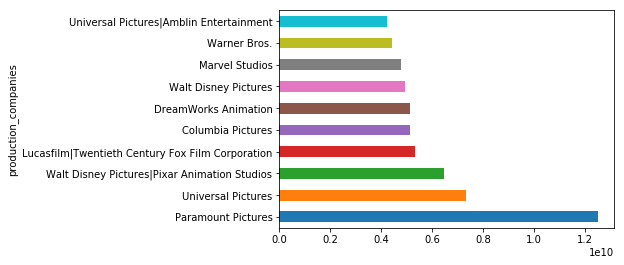

In [41]:
df.groupby('production_companies')['profit'].agg(sum).sort_values(ascending=False).head(10).plot(kind='barh',fig=(15,15))

The visualization above shows the top 10 highest producing companies ranked by the total profit. 

In [42]:
df.groupby('production_companies')['profit','vote_average'].agg(sum).sort_values(by='profit',ascending=False).head(10)

,profit,vote_average
production_companies,,
Paramount Pictures,1.252213e+10,963.7
Universal Pictures,7.311024e+09,793.7
Walt Disney Pictures|Pixar Animation Studios,6.463452e+09,120.1
Lucasfilm|Twentieth Century Fox Film Corporation,5.310129e+09,23.7
Columbia Pictures,5.129938e+09,438.9
DreamWorks Animation,5.120201e+09,196.3
Walt Disney Pictures,4.928936e+09,450.0
Marvel Studios,4.755325e+09,146.9
Warner Bros.,4.431885e+09,506.6


In [43]:
# companies Spielberg has worked for.
df.loc[df['director']=='Steven Spielberg',['production_companies','director','profit']]

,production_companies,director,profit
33,DreamWorks SKG|Amblin Entertainment|Studio Bab...,Steven Spielberg,1.128016e+08
1334,Columbia Pictures Corporation|EMI Films|Julia ...,Steven Spielberg,1.021009e+09
2638,DreamWorks SKG|Amblin Entertainment|Stanley Ku...,Steven Spielberg,1.673919e+08
2879,Lucasfilm|Paramount Pictures,Steven Spielberg,6.093289e+08
3397,Paramount Pictures|Columbia Pictures|WingNut F...,Steven Spielberg,2.345362e+08
3414,DreamWorks SKG|Amblin Entertainment|Reliance E...,Steven Spielberg,1.081702e+08
3918,DreamWorks SKG|Kemp Company|Splendid Pictures,Steven Spielberg,3.638170e+08
3921,DreamWorks SKG|Cruise/Wagner Productions|Ambli...,Steven Spielberg,3.107910e+08
4425,DreamWorks|Amblin Entertainment|Twentieth Cent...,Steven Spielberg,1.997250e+08
5387,DreamWorks,Steven Spielberg,5.162149e+07


In [44]:
# James Cameron stats.
df.loc[df['director']=='James Cameron'].count()

popularity              10
original_title          10
cast                    10
director                10
keywords                 8
runtime                 10
genres                   9
production_companies     9
vote_count              10
vote_average            10
release_year            10
budget_adj              10
revenue_adj             10
profit                  10
dtype: int64

### Research Question 2  (Genres)

Here we're going to ask questions about the genres and profits


Text(0.5,1,'A pie chart to show our top 5 popular genres')

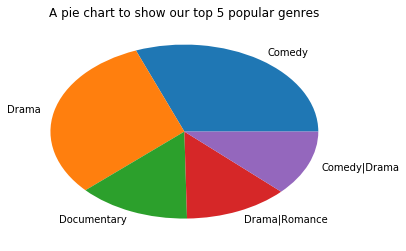

In [45]:
df_4 = df.genres.value_counts().head(5)
my_label = ['Comedy','Drama','Documentary','Drama|Romance','Comedy|Drama']
plt.pie(df_4, labels=my_label)
plt.title('A pie chart to show our top 5 popular genres')

In [46]:
# for each genre, what is the total time and profit?
df.groupby('genres')['runtime','profit'].agg(sum).sort_values(ascending=False,by='profit').head(10)

,runtime,profit
genres,,
Comedy,66346,3.090342e+10
Drama,79537,2.640500e+10
Comedy|Romance,26918,1.443584e+10
Comedy|Drama|Romance,23227,1.067138e+10
Drama|Romance,32671,1.050766e+10
Horror|Thriller,24054,1.014573e+10
Horror,22550,1.001261e+10
Comedy|Drama,28727,9.217386e+09
Adventure|Action|Thriller,3097,9.189741e+09


In [47]:
# i could ask which genre had the highest  profit?
df.groupby('genres')['runtime','profit'].agg(max).sort_values(by='profit',ascending=False).head(10)

,runtime,profit
genres,,
Adventure|Action|Science Fiction,142,2.750137e+09
Action|Adventure|Fantasy|Science Fiction,292,2.586237e+09
Drama|Romance|Thriller,194,2.234714e+09
Drama|Horror|Thriller,254,2.128036e+09
Horror|Thriller|Adventure,124,1.878643e+09
Science Fiction|Adventure|Family|Fantasy,115,1.767968e+09
Action|Adventure|Science Fiction|Fantasy,136,1.718723e+09
Crime|Drama|Mystery|Thriller|Action,114,1.551568e+09
Adventure|Animation|Comedy|Family,92,1.545635e+09


In [48]:
# which genre had the longest runtime and what is their corresponding profit? 
df.groupby('genres')['profit','runtime'].agg(max).sort_values(by='runtime',ascending=False).head(10)

,profit,runtime
genres,,
Documentary,1.305845e+08,900
Science Fiction,5.682104e+07,877
Action|Drama|War,1.363850e+08,705
Drama|History|Western,3.381332e+07,561
War|Drama|Action|Adventure|History,-6.863564e+07,540
History|Drama,9.883662e+07,501
Drama|War|History,3.381332e+07,470
Drama|History|Romance,1.896460e+08,421
Adventure|Comedy|Family|Fantasy|Mystery,3.381332e+07,417


The code above and the output gives a result of our top 10 longest genres and their profit respectively. 

In [49]:
# create a special variable for top 10 genres
genre = df.groupby('genres')['profit','runtime'].agg(sum).sort_values(by='profit',ascending=False).head(10).index
genre

Index(['Comedy', 'Drama', 'Comedy|Romance', 'Comedy|Drama|Romance',
       'Drama|Romance', 'Horror|Thriller', 'Horror', 'Comedy|Drama',
       'Adventure|Action|Thriller', 'Documentary'],
      dtype='object', name='genres')

In [50]:
#create a special variable for the top 10 highest profit of the genres
genre_profit = np.array(df.groupby('genres')['profit'].agg(sum).sort_values(ascending=False).head(10))
genre_profit

array([  3.09034178e+10,   2.64050001e+10,   1.44358432e+10,
         1.06713762e+10,   1.05076640e+10,   1.01457300e+10,
         1.00126132e+10,   9.21738594e+09,   9.18974109e+09,
         8.69068473e+09])

To get just the values column, i had to covert the output of my groupby summary to an array. This will help me to carry a visualization.

Text(0.5,0,'Genres')

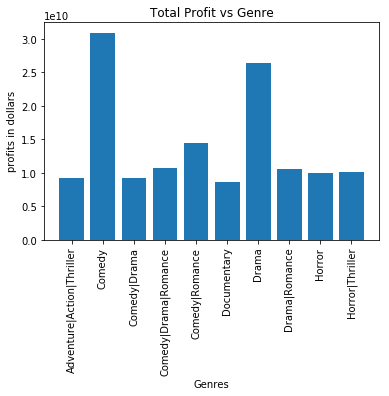

In [51]:
plt.bar(genre,genre_profit)
plt.xticks(rotation=90)
plt.title('Total Profit vs Genre')
plt.ylabel("profits in dollars")
plt.xlabel('Genres')

The plot above shows the total profit made by our top 10 genres. It can be seen that comedy and drama are our highest. There seems to be a large variation in profits by these two genres compared to the remaining 8 in our top 10. So what we can make out of this plot, it seems more people are interested in  the comedy and drama genre, hence the high total profit. 

# Research Question 3 (release_year)

We can ask questions about the release_date and see if we can uncover an underlying pattern.

In [52]:
# how many movies were released each year?
df['release_year'].value_counts().head(10)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
Name: release_year, dtype: int64

The result above shows us the number of movies released each year for the top 10 highest from our dataset.

We have a table that gives us the numbers of movies produced each year. We see clearly that we have the highest in the most recent year. Now we can go further to split this table into to independent columns so we can do a visualization of it.

In [53]:
# create a variable to extract the years.
years =df['release_year'].value_counts().index
years

Int64Index([2014, 2013, 2015, 2012, 2011, 2009, 2008, 2010, 2007, 2006, 2005,
            2004, 2003, 2002, 2001, 2000, 1999, 1998, 1996, 1997, 1994, 1993,
            1995, 1988, 1989, 1992, 1991, 1990, 1987, 1986, 1985, 1984, 1981,
            1982, 1983, 1980, 1978, 1979, 1977, 1971, 1973, 1974, 1976, 1966,
            1975, 1964, 1970, 1967, 1972, 1968, 1965, 1963, 1962, 1960, 1969,
            1961],
           dtype='int64')

This is a record of all the years for the various movies that were produced.

This output here is a successful splitting and isolating the year from the count. we have stored it in the variable called years.

In [54]:
# create a variable for the count.
counts=np.array(df['release_year'].value_counts())
counts

array([700, 659, 629, 588, 540, 533, 496, 490, 438, 408, 364, 307, 281,
       266, 242, 227, 224, 210, 204, 192, 184, 178, 175, 145, 137, 133,
       133, 132, 125, 121, 109, 105,  82,  81,  80,  78,  65,  57,  57,
        55,  55,  47,  47,  46,  44,  42,  41,  40,  40,  39,  35,  34,
        32,  32,  31,  31])

We had to convert it to a numpy array so we could isolate the count values for each year. At this point, we're ready to plot our point and clearly visualize the insights earlier observed from then frequency table.

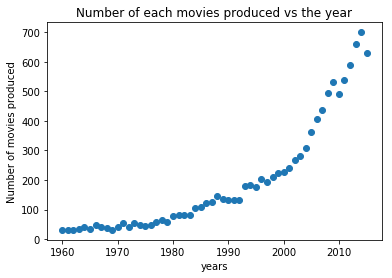

In [55]:
plt.scatter(data=df,x=years,y=counts,)
plt.xlabel("years")
plt.ylabel('Number of movies produced')
plt.title("Number of each movies produced vs the year")
plt.legend()

A scatter plot to show the relationship between the number of movies produced vs the year of production. It is clearly seen that from the earliest year of production to the most recent year, that it increased non-linearly. I can say that there's an exponential increase as visibly captured here and it has its highest at the most recent date in our dataset.

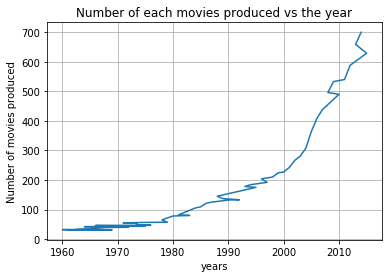

In [56]:
# we can visualize what this output looks like 
plt.plot(years, counts)
plt.xlabel("years")
plt.ylabel('Number of movies produced')
plt.title("Number of each movies produced vs the year")
plt.grid()

We see a trend here. The number of movies released increases each year and has it's peak at the most recent year which is 2014. This could mean that the movie industry is lucrative and more people are interested in entertainment, which is one possible reason which there's a steady rise in number of movies released each year. 

<a id='conclusions'></a>
## Conclusions
#### The analysis began with an intoduction and clear statement of the questions intended to be answered by the data. The necessary libraries were imported and the data loaded to our notebook. Then we moved into the inspection to get familiar with our data.  At the Data wrangling stage, we did some adjustment to our data. Also we proceeded to cleaning the data, dealing with null values, dropping of irrelevant columns that we would not need for the analysis. Then we proceeded to the Exploratory stage where we asked our data questions and carried out both univariate and bivariate analysis. We also provided visuals to help pass the point more clearly.

#### Below are the summary of the Insights and limitations with our data.

> **INSIGHTs**:
 > 1. Paramount Pictures produced most number of movies.
 > 2. Lucasfilm|Twentieth Century Fox Film Corporation made the highest profit.
 > 3. SMV Enterprises|Columbia Music Video|EMI had the highest vote_average.
 > 4. Steven Spielberg had the highest profit of  1.315341e+10 dollars	among the directors
 > 5. Paramount Pictures  made the most profit of 1.252213e+10 dollars
 > 6. For the genre, Comedy	had the highest total profit of 3.090342e+10 dollars
 > 7. Adventure|Action|Science Fiction had the highest profit of 2.750137e+09 dollars for the genres class.
 > 8. Documentary genre had the highest runtime of 900 minutes.
 > 9. From the release_year field, there was an increase in the number of movies produced each year and had it peak in the most 
      in the most recent year 2014 as captured in the data.
 > 10. The trend line shows that the number of movies produced each year increased, not linearly but exponentially, having its        least at the earliest year of production. 



> **Limitations**:
    > 1. Too many missing values. 
    

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255